In [0]:
# cpu, gpu 선택을 위해 지원되는 디바이스 넘버 보기

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12990177384686261434, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 80602288830622020
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9755981976548987950
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701401920
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7255609727881729764
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [0]:
# clear_output() 으로 반복문에서 길~게 나오는 로그들을 매 루프마다 지우고 새로 출력하게 한다

from IPython.display import clear_output 

# InteractiveShell 옵션에 'all'을 주면 주피터노트북의 각 셀에서 가장 마지막 줄 뿐만 아니라, 출력하도록 한 모든 값이 출력됨

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 경고가 너무 많이뜨는경우 주피터가 죽기때문에 경고메세지는 무시하도록 설정

import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

# Matplotlib을 시각화 모듈로 사용하지만, plot의 기본 스타일은 seaborn의 스타일을 따르도록 한다

import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

# pandas 데이터프레임이 너무 긴~경우 가로, 세로 몇 줄까지 보여줄 것인지 설정

pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)


In [0]:
# colab에서의 한글 폰트 설정

import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


# # matplotlib 모듈에 한글폰트 적용
# from matplotlib import font_manager, rc
# font_name = 'AppleGothic'
# rc('font', family=font_name)

# # matplotlib에서 한글 사용 시, 마이너스 기호의 폰트가 깨지는 문제를 해결하는 설정
# mpl.rcParams['axes.unicode_minus'] = False

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.


In [0]:
import os

def getImageFromPath(path):
    x_dir_ls = []
    img_file = []
    y_list = []
    # count = 0

    for root, dirs, files in os.walk(path):
        for fname in files:
            full_fname = os.path.join(root, fname)
            # print(full_fname)
            x_dir_ls.append(full_fname)
            img_file.append(fname)
            y_list.append(fname.split("_")[0]) # 웹툰 제목을 y값인 라벨로 설정함(Y값은 파일명의 _앞에 위치한 웹툰 이름임)
            # count += 1 
            # if count == 2716:
            #   break
    # clear_output()        
    print("All image path listing complete!")
    return x_dir_ls, img_file, y_list # 각 이미지들의 경로, 이미지 파일명, y값 리스트 
# 실행예시
# path = 'D:/0_webtoon_imgs/test_dir_2'
# x_dir_ls, img_file, y_list = getImageFromPath(path)

In [0]:
# 이미지 numpy배열화

from PIL import Image as pil

# 이미지 path가 리스트로 있어야 가능함

def imageToNpArray(img_path_ls, w, h, img_mode): 
    X_RGBimgs = []
    graytoneimgs = []
    print("image to numpy array & image resizing on process")

    for i in range(0, len(img_path_ls)):

        # resize로 이미지 크기를 축소시켜서 사용할거임 : 메모리의 제한떄문..

        a = pil.open(img_path_ls[i]).resize((w,h), pil.ANTIALIAS).convert(mode=img_mode)
        
        k = np.asarray(a, dtype="uint8")
        
        X_RGBimgs.append(k)
        if i % 150 == 0:
            print(i,"/",len(img_path_ls)," ==> ",y_list[i], img_path_ls[i], k.shape, "completed", end='\r')
    plt.figure(figsize=(5,5))
    plt.imshow(a)
    plt.title("마지막으로 처리한 이미지")
    clear_output()
    plt.show()

    X_raw=np.asarray(X_RGBimgs)
    X_raw = X_raw.astype('float32')/255.0         
    
    print("image processing complete!",w,"*",h,"--")
    print("마지막으로 처리한 이미지")
    print(X_raw.shape, X_raw.dtype)
    
    return  X_raw, graytoneimgs

In [0]:
import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session

config = tf.compat.v1.ConfigProto(log_device_placement=True)
config.gpu_options.allow_growth = True       # 메모리가 더 필요한 경우 자동 증폭
config.gpu_options.per_process_gpu_memory_fraction = 1.0      # keras의 gpu 메모리 점유율 설정

tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [0]:
path1 = '/content/drive/My Drive/naver_12'
x_dir_ls1, img_file1, y_list1 = getImageFromPath(path1)
print("카테고리 갯수, x_dir갯수, img_file 갯수 : ", len(set(y_list1)), len(x_dir_ls1), len(img_file1))

All image path listing complete!
카테고리 갯수, x_dir갯수, img_file 갯수 :  12 4153 4153


In [0]:
path2 = '/content/drive/My Drive/naver_22'
x_dir_ls2, img_file2, y_list2 = getImageFromPath(path2)
print("카테고리 갯수, x_dir갯수, img_file 갯수 : ", len(set(y_list2)), len(x_dir_ls2), len(img_file2))

All image path listing complete!
카테고리 갯수, x_dir갯수, img_file 갯수 :  21 7700 7700


In [0]:
x_dir_ls = x_dir_ls1 + x_dir_ls2
img_file = img_file1 + img_file2
y_list = y_list1 + y_list2

In [0]:
print("카테고리 갯수, x_dir갯수, img_file 갯수 : ", len(set(y_list)), len(x_dir_ls), len(img_file))

카테고리 갯수, x_dir갯수, img_file 갯수 :  33 11853 11853


In [0]:
# 라벨을 그림 작가명으로 한다
changed_y_list = []

for title in y_list:
  drawing_author = title.split(",")[1].strip()
  splited = drawing_author.split("&")
  if len(splited) == 1:
    drawing_author = drawing_author
  else:
    drawing_author = splited[1].strip()
  
  changed_y_list.append(drawing_author)

y_list = changed_y_list

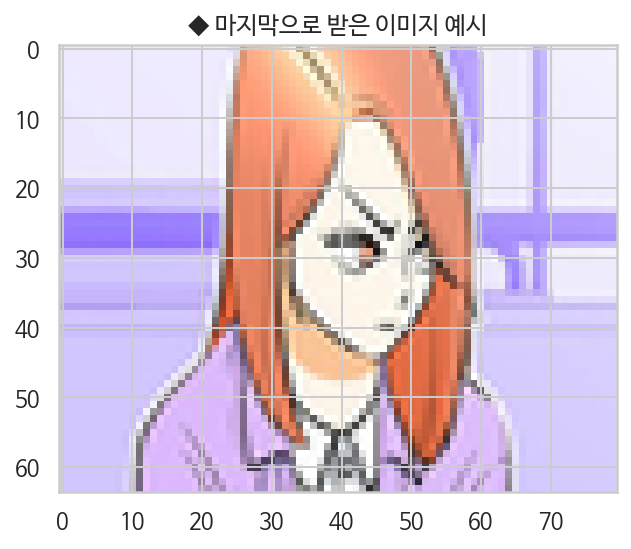

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(11853, 64, 80, 3) float32


In [0]:
# 이미지 path 리스트, 가로px, 세로px, 이미지 모드

X_raw, error_imgs = imageToNpArray(x_dir_ls, 35, 21, "RGB")
np.save('/content/drive/My Drive/Colab Notebooks/naver_33_nparray_35*21', X_raw)
len(X_raw)

In [0]:
# loaded_array = np.load('/content/drive/My Drive/Colab Notebooks/naver_33_nparray_80*64.npy')
# len(loaded_array)

In [0]:
X_raw = loaded_array
len(X_raw)

In [0]:
print('Y데이터형태')
num_cat = len(set(y_list))
print("갯수:",len(y_list),"// 카테고리", num_cat)

Y데이터형태
갯수: 11853 // 카테고리 33


In [0]:
# y_list 라벨데이터(string) ->  숫자 라벨로 바꾸기 
# 이후에 다시 이 숫자를 그에 대응하는 라벨(string)로 변환시키는 메소드를 사용 할 수 있다 

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = y_list
le.fit(y)
y= le.transform(y)


LabelEncoder()

In [0]:
le.inverse_transform([y[2]])    # 인덱스가 클래명과 대응한다

array(['김인호'], dtype='<U9')

In [0]:
le.classes_    # 인덱스가 클래명과 대응한다 

array(['232', 'SIU', '강호진', '고일권', '구동인', '기안84',
       '김성민', '김세훈', '김인호', '랑또', '마인드C',
       '박용제', '박태준', '빤쓰', '사다함', '삭', '상아',
       '상하', '영파카', '윤현석', '이동건', '이상규', '이채은',
       '장래혁', '장태산', '전선욱', '조석', '조용석', '촌장',
       '최병열', '카레곰', '쿠당탕', '호패'], dtype='<U9')

In [0]:
# 트레인 / 테스트데이터 나누기
# to_categorical 함수로 원 핫 인코딩해서 각 라벨들을 벡터로 만든다

from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.02, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.02, random_state=0)

Y_train = np_utils.to_categorical(y_train, num_cat) 
Y_test = np_utils.to_categorical(y_test, num_cat)
Y_validation = np_utils.to_categorical(y_validation, num_cat)

Using TensorFlow backend.


In [0]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((11382, 64, 80, 3), (11382,), (233, 64, 80, 3), (233,))

In [0]:
Y_train.shape, Y_test.shape, Y_validation.shape

((11382, 33), (238, 33), (233, 33))

In [0]:
# train data의 오그멘테이션 자료 set 만들기

from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    zoom_range=0.05,
    rotation_range=30,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True)

train_generator.fit(X_train)

train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 15 #오그멘테이션 할 배수
print("augmentation number : ", N)

X_train_new = []
Y_train_new = []

for i in range(N):
    print("generating"+ i +"th augmented data", end="... ")
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)
    print(i + "th augmentation complete!")
    
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

clear_output()
print("augmentation complete!!")
X_train_new.shape

All data are Generated!!


(170730, 64, 80, 3)

**학습과정 그리는 함수**

In [0]:
def model_history(model, hist, X_test, Y_test):
  # 테스트데이터로 평가
  score = model.evaluate(X_test, Y_test, verbose=0)

  # model의 학습 과정 나타내기
  %matplotlib inline
  import matplotlib.pyplot as plt

  history = hist.history
  score = score

  fig, loss_ax = plt.subplots(figsize=(8, 6))

  acc_ax = loss_ax.twinx()

  loss_ax.plot(history['loss'], 'y', label='train loss')
  loss_ax.plot(history['val_loss'], 'r', label='val loss')

  acc_ax.plot(history['accuracy'], 'b', label='train acc')
  acc_ax.plot(history['val_accuracy'], 'g', label='val acc')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('accuray')

  loss_ax.legend(loc='upper left')
  acc_ax.legend(loc='lower left')

  clear_output()
  plt.show()
  print('test_loss : ', score[0], 'test_accuracy : ', score[1])

**model**


In [0]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2

np.random.seed(0)

filter_num1, filter_num2, filter_num3, filter_num4, filter_num5 = 64, 96, 128, 256, 256
dropout_rate1, dropout_rate2, dropout_rate3, dropout_rate4, dropout_rate5 = 0.5, 0.5, 0.5, 0.5, 0.8
dense = 768

model = Sequential()

model.add(Conv2D(filter_num1, kernel_size=(3, 3), activation='relu', input_shape=(h, w, 3), padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num1, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D())             
model.add(Dropout(dropout_rate1))  

model.add(Conv2D(filter_num2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num2, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())            
model.add(Dropout(dropout_rate2))     

model.add(Conv2D(filter_num3, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num3, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())          
model.add(Dropout(dropout_rate3))  

model.add(Conv2D(filter_num4, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(filter_num4, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(dropout_rate4))

model.add(Flatten())
model.add(Dense(dense, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5))
model.add(Dense(dense, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5))              
model.add(Dense(dense, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5)) 
model.add(Dense(dense, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(dropout_rate5)) 

model.add(Dense(num_cat, activation='softmax')) # num_cat : 클래스 개수

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [0]:
# 학습시작

from keras.callbacks import ModelCheckpoint
import numpy as np

model_num = 1

save_path = '/content/drive/My Drive/Colab Notebooks/naver_33_model{}_checkpoint_epoch_35*21_dropout.h5'.format(model_num)
checkpoint = ModelCheckpoint(save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

hist = model.fit(X_train_new, Y_train_new, epochs=400, batch_size=768, validation_data=(X_validation, Y_validation), verbose=1, callbacks=[checkpoint])

np.save('/content/drive/My Drive/Colab Notebooks/naver_33_model{}_history_35*21_dropout'.format(model_num), hist.history)
model.save('/content/drive/My Drive/Colab Notebooks/naver_33_model{}_35*21_dropout.h5'.format(model_num))

In [0]:
model_history(model, hist, X_test, Y_test)

**모델 사용하여 predict**

In [0]:
# 테스트 데이터 보기
from sklearn.metrics import *
# X_test.shape
# V_raw.shape
y_pred = loaded_model.predict(X_test,verbose=0)
# print(y_pred)

In [0]:
# inverse_transform은 수치화된 라벨값에 대응하는 원래의 라벨 명칭을 반환한다
label_Y = le.inverse_transform(y_test)
# result_df = pd.DataFrame([label_Y,y_test[0:50]],columns=['real_wbt_id','Y_val'])
result_df = pd.DataFrame()

# 원래의 y 카테고리 명칭
result_df['id']=label_Y

# 라벨인코더로 수치화시킨 y값
result_df['Y_val']=y_test

result_df = pd.concat([result_df,pd.DataFrame(y_pred)],axis=1)
clear_output()
result_df.tail()
print("테스트 데이터 갯수 : ", y_test.size)
print("(테스트 데이터 갯수, 카테고리 갯수) : ", y_pred.shape)

,id,Y_val,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
233,장래혁,23,5.569643e-03,4.792615e-03,4.064632e-03,1.237977e-03,7.088641e-03,1.818778e-03,6.389659e-05,0.316371,2.592916e-01,1.583051e-03,3.264368e-02,8.167244e-03,0.004914,7.723061e-03,1.424708e-04,6.852348e-03,0.000344,2.310978e-03,4.263594e-02,0.004726,4.508594e-02,5.004594e-04,2.711905e-04,2.304200e-01,2.709275e-04,4.143920e-04,1.663966e-04,4.089372e-04,7.247524e-06,1.425443e-03,0.000395,4.454497e-03,3.838929e-03
234,이동건,20,1.688701e-03,5.198247e-04,3.316866e-05,3.373218e-07,1.937491e-03,1.421474e-03,6.313926e-08,0.003720,3.119480e-02,1.354186e-03,1.495029e-03,6.710941e-05,0.000017,8.944167e-04,5.679969e-06,1.613012e-06,0.000192,1.883380e-03,8.882501e-03,0.000150,9.357630e-01,5.362323e-06,6.235716e-06,2.626311e-03,1.106972e-09,4.038234e-05,5.416204e-05,6.589681e-05,1.101838e-06,6.232573e-07,0.000007,5.916587e-03,5.425726e-05
235,강호진,2,7.393835e-04,2.538991e-03,9.341400e-01,9.284415e-05,9.761981e-04,9.613874e-05,9.416317e-05,0.003110,8.260959e-05,1.951878e-04,1.296012e-02,1.108565e-05,0.000018,3.944253e-03,1.989583e-04,6.100959e-05,0.001990,4.233264e-08,1.684612e-04,0.000041,2.529737e-04,5.659740e-04,5.612571e-05,8.155647e-03,1.127839e-04,3.502124e-06,2.139606e-02,1.055165e-03,5.480706e-03,3.511475e-04,0.000444,5.678229e-04,9.864000e-05
236,호패,32,1.235086e-07,3.034407e-09,8.211629e-08,3.589051e-12,7.675263e-08,1.462046e-10,3.720729e-08,0.000221,1.522743e-09,6.788512e-09,9.072171e-13,1.212857e-08,0.000029,1.409924e-11,2.219543e-07,1.009579e-15,0.000003,9.630527e-10,6.347509e-13,0.000007,5.358598e-11,9.113345e-09,1.369887e-08,5.363573e-07,1.396542e-05,6.939040e-11,1.738824e-13,6.912697e-08,6.541689e-08,2.718974e-11,0.000048,2.239265e-11,9.996767e-01
237,영파카,18,3.997648e-05,1.457376e-03,2.011105e-06,9.670360e-06,7.740683e-05,2.299550e-05,4.967713e-07,0.000205,1.295103e-03,8.111419e-06,1.477119e-04,4.327468e-04,0.000019,2.112084e-05,2.008703e-04,6.795226e-06,0.000102,2.569120e-05,9.927147e-01,0.001001,2.430865e-04,2.694086e-08,4.250480e-07,1.874889e-03,2.117140e-10,2.587140e-07,1.043004e-05,4.962940e-07,1.456207e-09,9.719084e-06,0.000004,6.674038e-05,4.687742e-08


테스트 데이터 갯수 :  238
(테스트 데이터 갯수, 카테고리 갯수) :  (238, 33)


In [0]:
np.sum(result_df.iloc[3][2:])

0.99999994

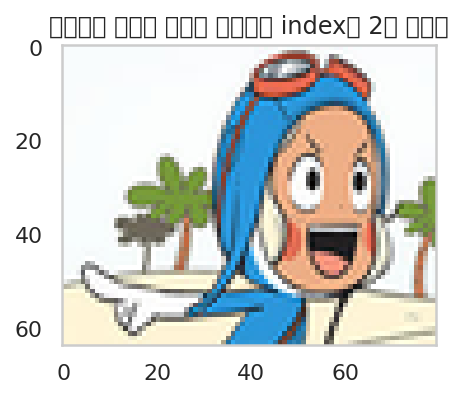

In [0]:
#직접 눈으로 비교할 label숫자 설정
find_i = 11  

# X_test
test_img = X_test[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(14,16))
plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트에 사용한 썸네일 이미지중 index가 2인 이미지'
plt.title(info2)
clear_output()
plt.show()


In [0]:
# X_test의 find_i에 해당하는 이미지의 각 카테고고리(라벨)에 속할 확률값들을 가져온다
finded = result_df.iloc[find_i,2:]

temp = pd.DataFrame()

# finded 의 인덱스는 각 카테고리 명칭을 수치화 한 숫자들이니까, 이걸 다시 기존 웹툰 제목으로 바꾼다
temp["id"] = le.inverse_transform(list(finded.index))

# 이 각 웹툰에 현재 선택한 이미지인 X_test[find_i]가 속할 확률을 데이터프레임으로 만든거임
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)
top10_df

,id,proba
20,이동건,1
8,김인호,2.53992e-08
18,영파카,5.28789e-10
17,상하,1.82196e-10
19,윤현석,1.81289e-10
1,SIU,6.01949e-11
9,랑또,4.47755e-11
27,조용석,1.64903e-11
16,상아,1.32433e-11
25,전선욱,6.62167e-12


In [0]:
x_dir_ls[:2]

['/content/drive/My Drive/naver_12/갓 오브 하이스쿨, 박용제_278화.png',
 '/content/drive/My Drive/naver_12/패밀리 사이즈, 남지은&김인호_시즌2 28화.png']

In [0]:
# regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/.{0,}' + 'D JUN' + '.{0,}')
# regex.findall('/content/drive/My Drive/total_img_naver/total_img/Here U Are, D JUN_5화.png')


['/content/drive/My Drive/total_img_naver/total_img/Here U Are, D JUN_5화.png']

In [0]:
# top10에 해당하는 작가의 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
# drawing_author_list = []

for idx, row in top10_df.iterrows():  
  # drawing_author_list.append(row['id'])
  drawing_author = row['id']
  regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/.{0,}' + drawing_author + '.{0,}')

  for each_dir in x_dir_ls:
    # print(each_dir)
    matched_path = regex.findall(each_dir)
    
    # break
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

IndexError: ignored

In [0]:
top10_path_list

['/content/drive/My Drive/total_img_naver/total_img/히어로메이커, 빤쓰_히어로메이커 49화 <습격>.png',
 '/content/drive/My Drive/total_img_naver/total_img/회춘, 기안84_19화 회춘 아빠 3화.png',
 '/content/drive/My Drive/total_img_naver/total_img/윈드브레이커, 조용석_3부 - 02화 찢겨진 날개.png',
 '/content/drive/My Drive/total_img_naver/total_img/호랭총각, 강호진_5 부 호 권 - 30. 미안..그건 실수였어..png',
 '/content/drive/My Drive/total_img_naver/total_img/나이트런, 김성민_나이트런 EX 문 오프닝 98화.png',
 '/content/drive/My Drive/total_img_naver/total_img/같은도장, 이힝_55화.png',
 '/content/drive/My Drive/total_img_naver/total_img/행성인간, 조석_35화.png',
 '/content/drive/My Drive/total_img_naver/total_img/소녀의 세계, 모랑지_212화 이번엔...png',
 '/content/drive/My Drive/total_img_naver/total_img/신의 언어, 장래혁_2부 114화 미끼 (1).png',
 '/content/drive/My Drive/total_img_naver/total_img/프리드로우, 전선욱_제134화 한태성의 일진 과

In [0]:
# title

In [0]:
title_list = []
for each_path in top10_path_list:
  title_with_author = each_path[len('/content/drive/My Drive/total_img_naver/total_img/'):].split("_")[0]
  title_list.append(title_with_author)

In [0]:
title_list

['히어로메이커, 빤쓰',
 '회춘, 기안84',
 '윈드브레이커, 조용석',
 '호랭총각, 강호진',
 '나이트런, 김성민',
 '같은도장, 이힝',
 '행성인간, 조석',
 '소녀의 세계, 모랑지',
 '신의 언어, 장래혁',
 '프리드로우, 전선욱']

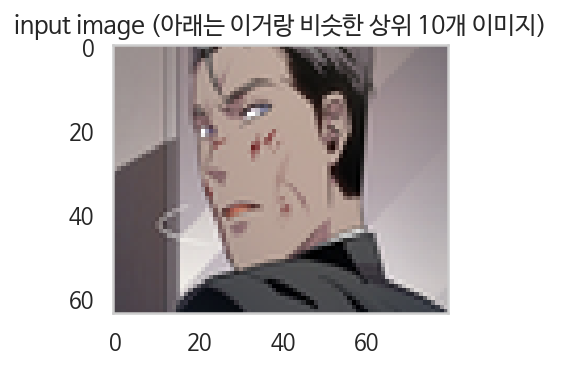

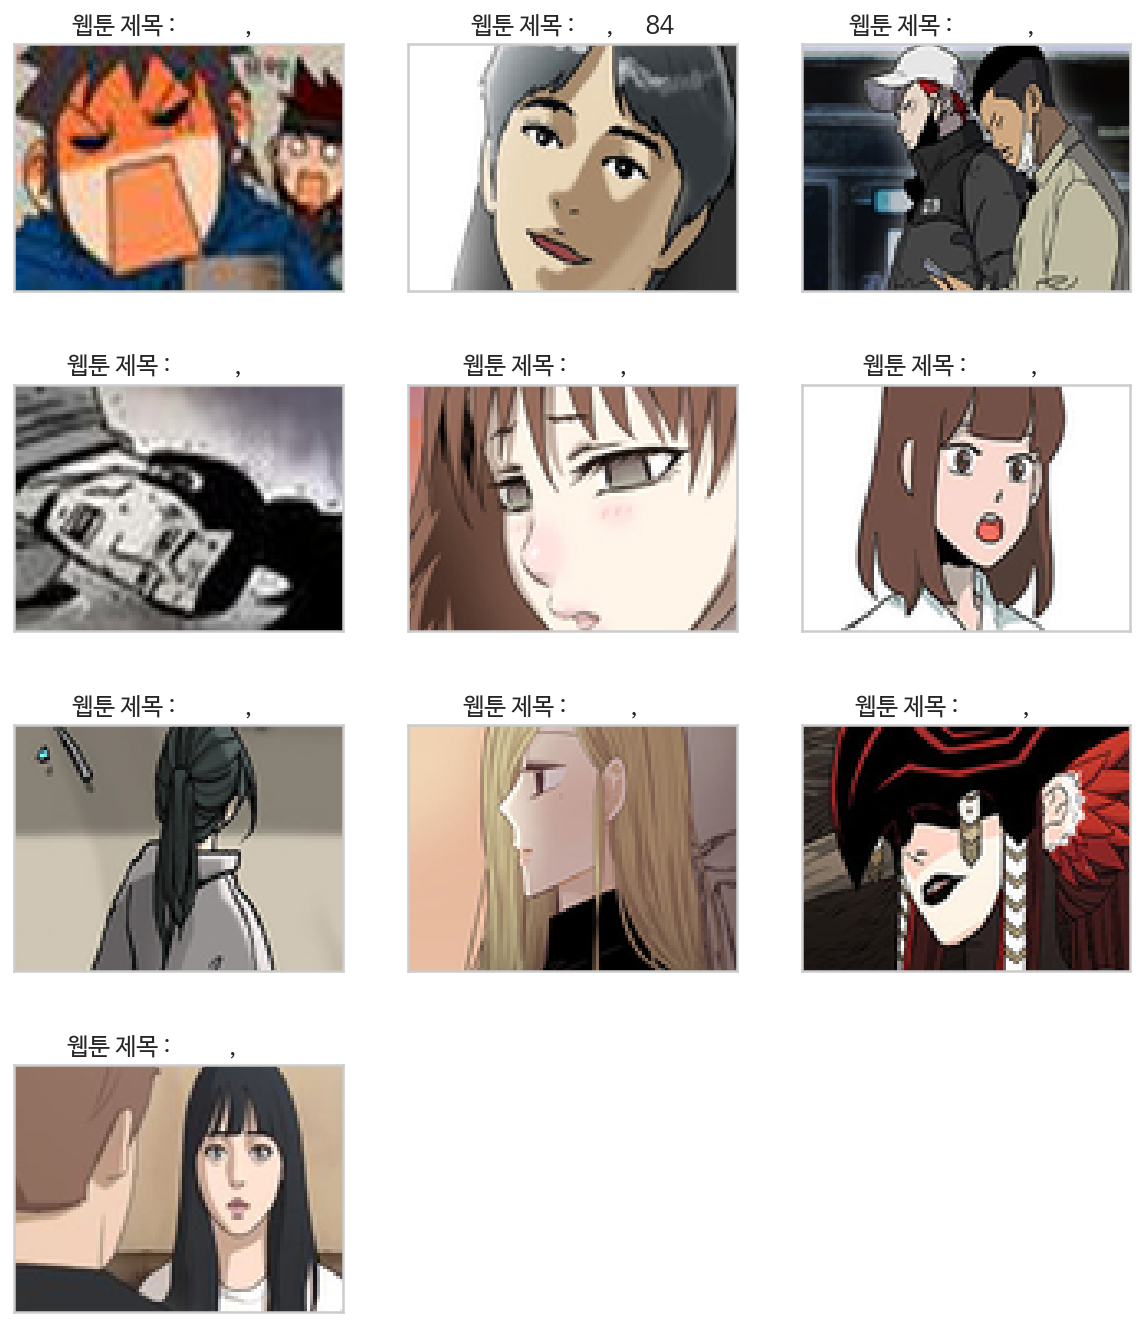

In [0]:
# proba기준 테스트에 사용한 썸네일 이미지와 가장 유사한 상위 10개웹툰 나열 --------------------------

# 비교용으로 넣은 테스트 이미지 

find_i = 521  # X_test index => 521 (세상은 돈과 권력)

# X_test
test_img = X_test[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image (아래는 이거랑 비슷한 상위 10개 이미지)'
plt.title(info2)
clear_output()
# plt.show()


i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + info, fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()

**다른 플랫폼의 웹툰 이미지를 가져와서 비슷한 그림체 뽑아보기**


In [0]:
# 트레이닝에도 없고 테스트에도 없는 웹툰 썸네일 이미지 갖고와서 predict해보기

test_path = '/content/drive/My Drive/test_img/'
v_dir_ls, v_img_file, v_list = getImageFromPath(test_path)

All image path listing complete!


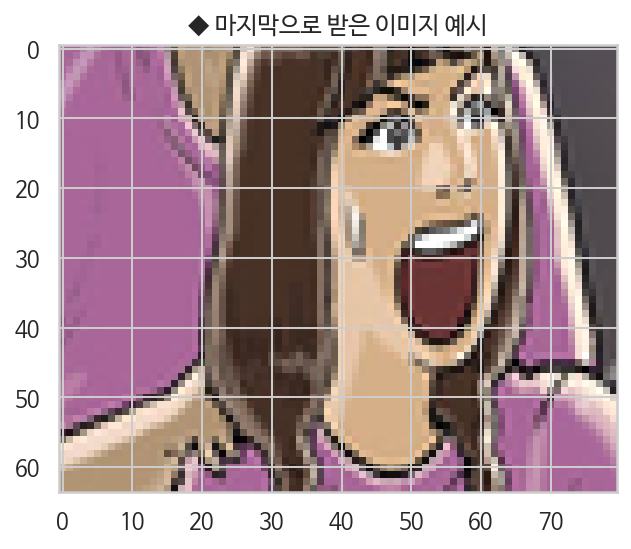

◆ 이미지 np.array화 완료! 80 * 64 --
이미지 데이터 형태▽
(10, 64, 80, 3) float32


In [0]:
V_raw, v_error_imgs = imageToNpArray(v_dir_ls,80,64,"RGB")       # 이미지 path 리스트, 가로px, 세로px, 이미지 모드

In [0]:
# 미리 트레이닝 시켜둔 예측모델 불러오기
# from keras.models import load_model

# model = load_model("/content/drive/My Drive/Colab Notebooks/daum_thumbnail_model.h5")

In [0]:
# 직접 이미지를 분류모델에 넣어서 proba값 확인

y_pred = loaded_model.predict(V_raw, verbose=1)
# print(y_pred)

10/10 [==============================] - 6s 616ms/step


In [0]:
le.classes_

array(['232', 'SIU', '강호진', '고일권', '구동인', '기안84',
       '김성민', '김세훈', '김인호', '랑또', '마인드C',
       '박용제', '박태준', '빤쓰', '사다함', '삭', '상아',
       '상하', '영파카', '윤현석', '이동건', '이상규', '이채은',
       '장래혁', '장태산', '전선욱', '조석', '조용석', '촌장',
       '최병열', '카레곰', '쿠당탕', '호패'], dtype='<U9')

In [0]:
label_Y = le.inverse_transform(y_test)

In [0]:
result_df = pd.DataFrame()
result_df['id'] = v_img_file
# result_df['Y_val']=y_test
result_df = pd.concat([result_df, pd.DataFrame(y_pred)],axis=1)
clear_output()
# result_df.tail(10)
# y_test.size
y_pred.shape
print('id목록\n', result_df.id.unique())

(10, 33)

id목록
 ['회춘, 기안84_22화 새 엄마 2화.png'
 '회춘, 기안84_20화 회춘 아빠 4화.png'
 '회춘, 기안84_21화 새 엄마 1화.png'
 '회춘, 기안84_11화 회춘 엄마 마무리.png'
 '회춘, 기안84_12화 청춘 엄마 1화.png'
 '회춘, 기안84_5화 교장 1.png' '회춘, 기안84_7화 중년 엄마 1.png'
 '회춘, 기안84_4화 아들 3.png' '회춘, 기안84_6화 교장 마무리.png'
 '회춘, 기안84_10화 회춘 엄마  2.png']


In [0]:
result_df

,id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
0,"회춘, 기안84_22화 새 엄마 2화.png",2.171072e-02,4.385498e-02,6.502163e-02,9.799087e-04,1.246789e-01,0.062601,6.680558e-03,1.471232e-01,9.403590e-03,1.153166e-02,2.051652e-03,1.560430e-02,0.022090,0.013288,2.078118e-02,3.214034e-03,1.456567e-02,6.530300e-03,0.018014,1.531211e-02,0.032179,3.510076e-03,8.527531e-04,8.422052e-02,3.637495e-03,0.005513,0.003591,0.031741,4.599439e-03,0.016829,1.051064e-02,1.564676e-02,1.621329e-01
1,"회춘, 기안84_20화 회춘 아빠 4화.png",3.319246e-06,6.854324e-07,4.815916e-06,1.001425e-10,3.358062e-06,0.999442,6.795750e-09,6.494471e-07,3.512479e-06,2.582890e-06,1.566524e-10,3.985253e-08,0.000101,0.000024,8.812804e-06,1.657874e-10,1.879266e-06,2.302033e-06,0.000034,6.669499e-08,0.000137,1.764898e-11,5.307891e-13,3.944470e-08,3.493488e-11,0.000014,0.000006,0.000156,1.523394e-08,0.000045,1.555330e-10,4.598960e-06,4.421503e-06
2,"회춘, 기안84_21화 새 엄마 1화.png",5.264555e-04,3.053262e-04,6.707137e-04,2.694975e-06,8.272092e-04,0.971828,1.605804e-05,3.151174e-04,4.261011e-04,2.163300e-04,1.391446e-06,6.769809e-05,0.002106,0.001748,1.092980e-03,9.582986e-06,1.377587e-04,4.336749e-04,0.004432,5.097124e-05,0.004932,2.389345e-07,4.416718e-08,9.251042e-05,6.187521e-07,0.001201,0.000534,0.002973,8.211080e-06,0.003906,1.118007e-06,5.761143e-04,5.617694e-04
3,"회춘, 기안84_11화 회춘 엄마 마무리.png",1.419502e-03,2.484751e-03,1.164246e-03,8.076590e-06,5.536073e-03,0.897476,1.259124e-04,2.979942e-03,1.475871e-03,1.379788e-03,7.920322e-06,8.334225e-04,0.009202,0.004474,3.814961e-03,7.226913e-05,7.305678e-04,2.746079e-03,0.008235,8.186303e-04,0.016758,1.028738e-05,1.456861e-06,7.203672e-04,1.295042e-05,0.006254,0.000747,0.015744,8.488450e-05,0.006598,2.711900e-05,1.412292e-03,6.644729e-03
4,"회춘, 기안84_12화 청춘 엄마 1화.png",2.478031e-03,5.870537e-02,6.642194e-03,1.634583e-05,8.326932e-03,0.018948,6.833522e-04,2.730606e-01,3.454933e-03,4.123227e-04,7.955000e-05,3.721288e-03,0.396924,0.010756,5.029276e-03,3.164750e-04,4.624424e-03,1.097414e-04,0.008702,1.770950e-02,0.002209,4.549083e-04,5.304330e-05,7.001574e-02,2.801294e-03,0.001161,0.000117,0.049065,6.516543e-04,0.007087,3.005968e-04,8.750283e-05,4.529380e-02
5,"회춘, 기안84_5화 교장 1.png",1.122811e-05,1.470065e-06,6.660939e-06,6.848413e-10,8.183200e-06,0.999170,6.098027e-08,1.016573e-06,4.872396e-06,1.501794e-06,1.750304e-10,8.465982e-08,0.000199,0.000026,3.663408e-05,4.488439e-10,2.793295e-06,1.019232e-05,0.000069,1.599465e-07,0.000157,2.893738e-11,3.289438e-12,1.375242e-07,1.471542e-10,0.000037,0.000007,0.000128,3.600002e-08,0.000100,4.226603e-10,7.861103e-06,1.543346e-05
6,"회춘, 기안84_7화 중년 엄마 1.png",1.057052e-07,1.488823e-08,2.350456e-07,1.254803e-12,1.082104e-08,0.999909,4.491954e-11,2.039647e-08,5.400538e-07,3.757794e-08,2.265979e-12,1.264620e-09,0.000010,0.000032,9.698149e-08,3.761852e-12,9.983824e-09,3.041378e-08,0.000002,5.302558e-10,0.000017,1.366717e-14,2.313577e-16,2.275497e-10,5.504659e-13,0.000003,0.000001,0.000022,1.713306e-10,0.000003,2.477328e-13,1.593078e-07,3.823448e-08
7,"회춘, 기안84_4화 아들 3.png",1.840124e-05,2.023978e-05,6.855495e-06,2.231737e-09,2.167533e-05,0.991190,2.463189e-07,2.825009e-05,5.213971e-05,1.733602e-06,7.384756e-10,1.083917e-06,0.006089,0.000168,5.221300e-05,1.640748e-08,3.575363e-06,2.439438e-05,0.000240,2.835845e-06,0.000401,7.054369e-10,3.630307e-11,3.653461e-06,1.262384e-08,0.000295,0.000004,0.000810,1.224004e-07,0.000475,8.406915e-10,2.377355e-06,8.834870e-05
8,"회춘, 기안84_6화 교장 마무리.png",3.303258e-04,2.380338e-04,4.303696e-04,4.361135e-07,5.984987e-04,0.981978,9.405714e-06,1.498622e-04,1.592721e-04,1.523797e-04,3.723190e-07,2.838010e-05,0.001676,0.001079,7.973228e-04,1.268892e-06,1.492595e-04,2.153161e-04,0.001994,2.819816e-05,0.003209,1.154762e-07,1.341462e-08,3.674165e-05,1.907097e-07,0.000688,0.000312,0.003170,8.196199e-06,0.001724,7.046022e-07,3.835215e-04,4.523228e-04
9

In [0]:
le.classes_[5]

'기안84'

In [0]:
#직접 눈으로 비교할 label숫자 설정

find_i = 1       # 

# X_test
test_img = V_raw[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

In [0]:
# plt.imshow(test_img)

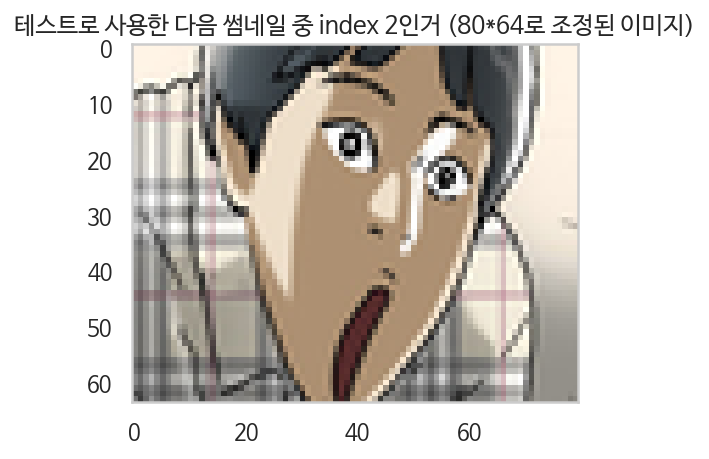

In [0]:
plt.figure(figsize=(4, 6))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = '테스트로 사용한 다음 썸네일 중 index 2인거 (80*64로 조정된 이미지)'
plt.title(info2)
clear_output()
plt.show()


In [0]:
# 다음 이미지를 넣었을때, 가장 비슷한 확률값을 가진 네이버 웹툰의 이미지 아무거나 10개 가져오기

finded = result_df.iloc[find_i,1:]
temp = pd.DataFrame()
temp["id"] = le.inverse_transform(list(finded.index))
temp["proba"] = finded
top10_df = temp.sort_values('proba', ascending=False).head(10)

In [0]:
top10_df

,id,proba
5,기안84,0.999442
27,조용석,0.000155873
20,이동건,0.000137334
12,박태준,0.000100908
29,최병열,4.48905e-05
18,영파카,3.43824e-05
13,빤쓰,2.42814e-05
25,전선욱,1.3612e-05
14,사다함,8.8128e-06
26,조석,6.03589e-06


In [0]:
# top10에 해당하는 작가의 웹툰 이미지 경로 아무거나 하나씩 가져오기

import re

top10_path_list = []
# drawing_author_list = []

for idx, row in top10_df.iterrows():  
  print(1)
  # drawing_author_list.append(row['id'])
  drawing_author = row['id']
  regex = re.compile('/content/drive/My Drive/total_img_naver/total_img/.{0,}' + drawing_author + '.{0,}')

  for each_dir in x_dir_ls:
    # print(each_dir)
    matched_path = regex.findall(each_dir)
    
    # break
    if len(matched_path) != 0:
      break

  top10_path_list.append(matched_path[0])

1


IndexError: ignored

In [0]:
drawing_author

'기안84'

In [0]:
top10_path_list

[]

In [0]:
top10_path_list

['/content/drive/My Drive/total_img_naver/total_img/패밀리 사이즈, 남지은&김인호_시즌2 232화.png',
 '/content/drive/My Drive/total_img_naver/total_img/프리드로우, 전선욱_제134화 한태성의 일진 과외 (1).png',
 '/content/drive/My Drive/total_img_naver/total_img/나이트런, 김성민_나이트런 EX 문 오프닝 98화.png',
 '/content/drive/My Drive/total_img_naver/total_img/패밀리 사이즈, 남지은&김인호_시즌2 362화.png',
 '/content/drive/My Drive/total_img_naver/total_img/유미의 세포들컷툰, 이동건_269화 우리집 끝판왕.png',
 '/content/drive/My Drive/total_img_naver/total_img/킬더킹, 마사토끼&joana_킬러 밤 (6).png',
 '/content/drive/My Drive/total_img_naver/total_img/호곡, 감대_02. 이상한 소녀.png',
 '/content/drive/My Drive/total_img_naver/total_img/약한영웅, 서패스&김진석_96화 - 바쿠, 고탁 (4).png',
 '/content/drive/My Drive/total_img_naver/total_img/회춘, 기안84_19화 회춘 아빠 3화.png',
 '/content/drive/My Drive/total_img_naver/total_img/소녀의 세ᄀ

In [0]:
title_list = []
for each_path in top10_path_list:
  title_with_author = each_path[len('/content/drive/My Drive/total_img_naver/total_img/'):].split("_")[0]
  title_list.append(title_with_author)

In [0]:
title_list

['패밀리 사이즈, 남지은&김인호',
 '프리드로우, 전선욱',
 '나이트런, 김성민',
 '패밀리 사이즈, 남지은&김인호',
 '유미의 세포들컷툰, 이동건',
 '킬더킹, 마사토끼&joana',
 '호곡, 감대',
 '약한영웅, 서패스&김진석',
 '회춘, 기안84',
 '소녀의 세계, 모랑지']

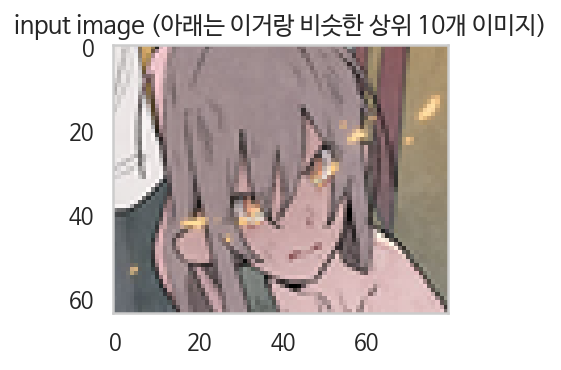

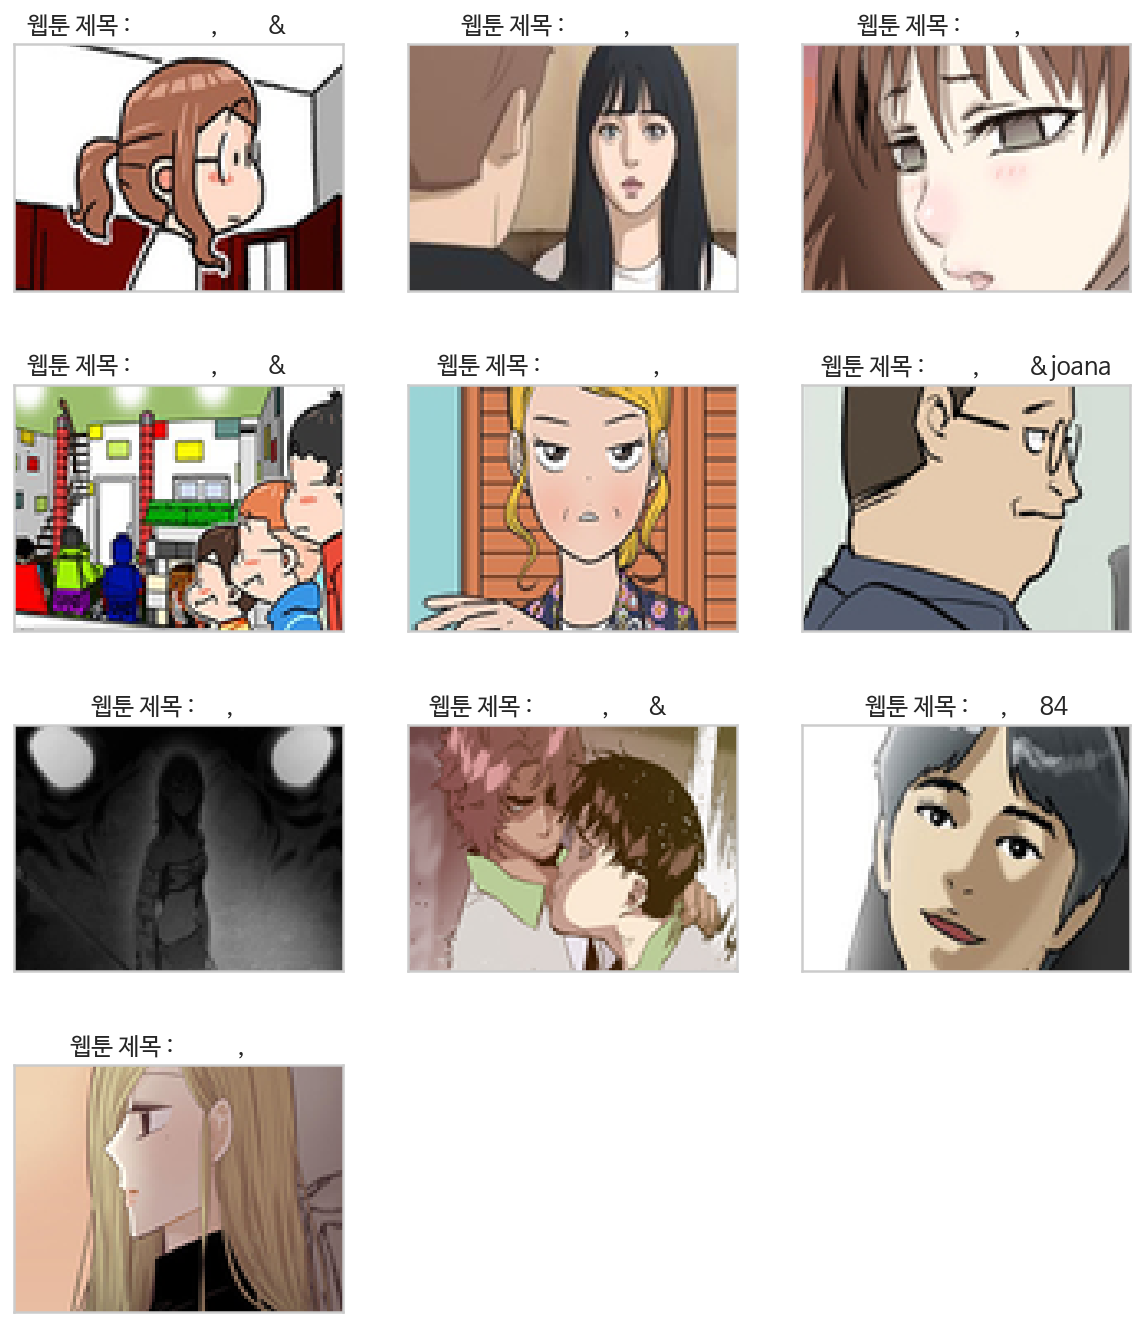

In [0]:
# proba기준 유사한 상위 10개웹툰 나열 --------------------------

# 비교용으로 넣은 테스트 이미지 


# X_test
test_img = V_raw[find_i]
test_img = test_img
# test_img
real_id = result_df.id[find_i]
# real_id

plt.figure(figsize=(3, 3))
# plt.subplot(5,3,2)
plt.imshow(test_img)
plt.grid(False)
info2 = 'input image (아래는 이거랑 비슷한 상위 10개 이미지)'
plt.title(info2)
clear_output()
# plt.show()

i = 0

plt.figure(figsize=(10,12))
for each_path in top10_path_list:   
  # fig = plt.figure()
  plt.subplot(4, 3, i + 1)  
  picture = pil.open(each_path).resize((100,75), pil.ANTIALIAS)
  plt.imshow(picture)
  plt.grid(False)
  info = str(title_list[i])
  plt.title('웹툰 제목 : ' + str(title_list[i]), fontsize='medium')
  # plt.subplots_adjust(hspace=0.4, wspace=0.2)
  plt.xticks([])
  plt.yticks([])
  i += 1

clear_output()

plt.show()